In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Import libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Load & Explore the Data

In [3]:
train_path= "/kaggle/input/spaceship-titanic/train.csv"
test_path= "/kaggle/input/spaceship-titanic/test.csv"

df= pd.read_csv(train_path)
test= pd.read_csv(test_path)
print("train shape: ", df.shape)
print("test shape: ", test.shape)

train shape:  (8693, 14)
test shape:  (4277, 13)


In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


1. RoomService, FoodCourt, Spa and VRDeck: contains more than 65% values 0 only while max values is 14327.

## EDA

In [7]:
print("null/missing percentage:")
print()
print((df.isna().mean()*100).round(2))

null/missing percentage:

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64


In [8]:
print("unique count:")
print()
print(df.nunique())

unique count:

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


In [9]:
categorical_features= ["HomePlanet", "CryoSleep", "Destination", "VIP"]

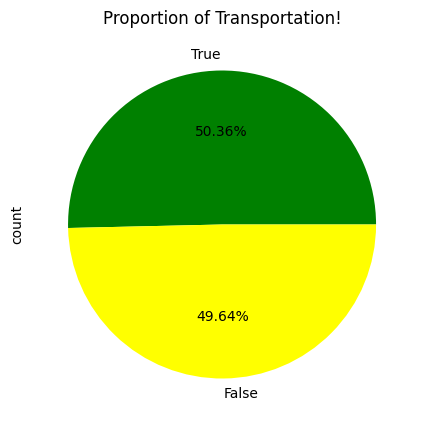

In [10]:
df["Transported"].value_counts().plot.pie(figsize=(5,5), autopct="%.2f%%", colors=["green", "yellow"])
plt.title("Proportion of Transportation!")
plt.show()

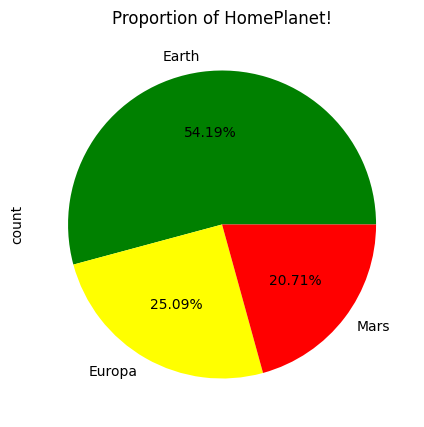

In [11]:
df["HomePlanet"].value_counts().plot.pie(figsize=(5,5), autopct="%.2f%%", colors=["green", "yellow","red"])
plt.title("Proportion of HomePlanet!")
plt.show()

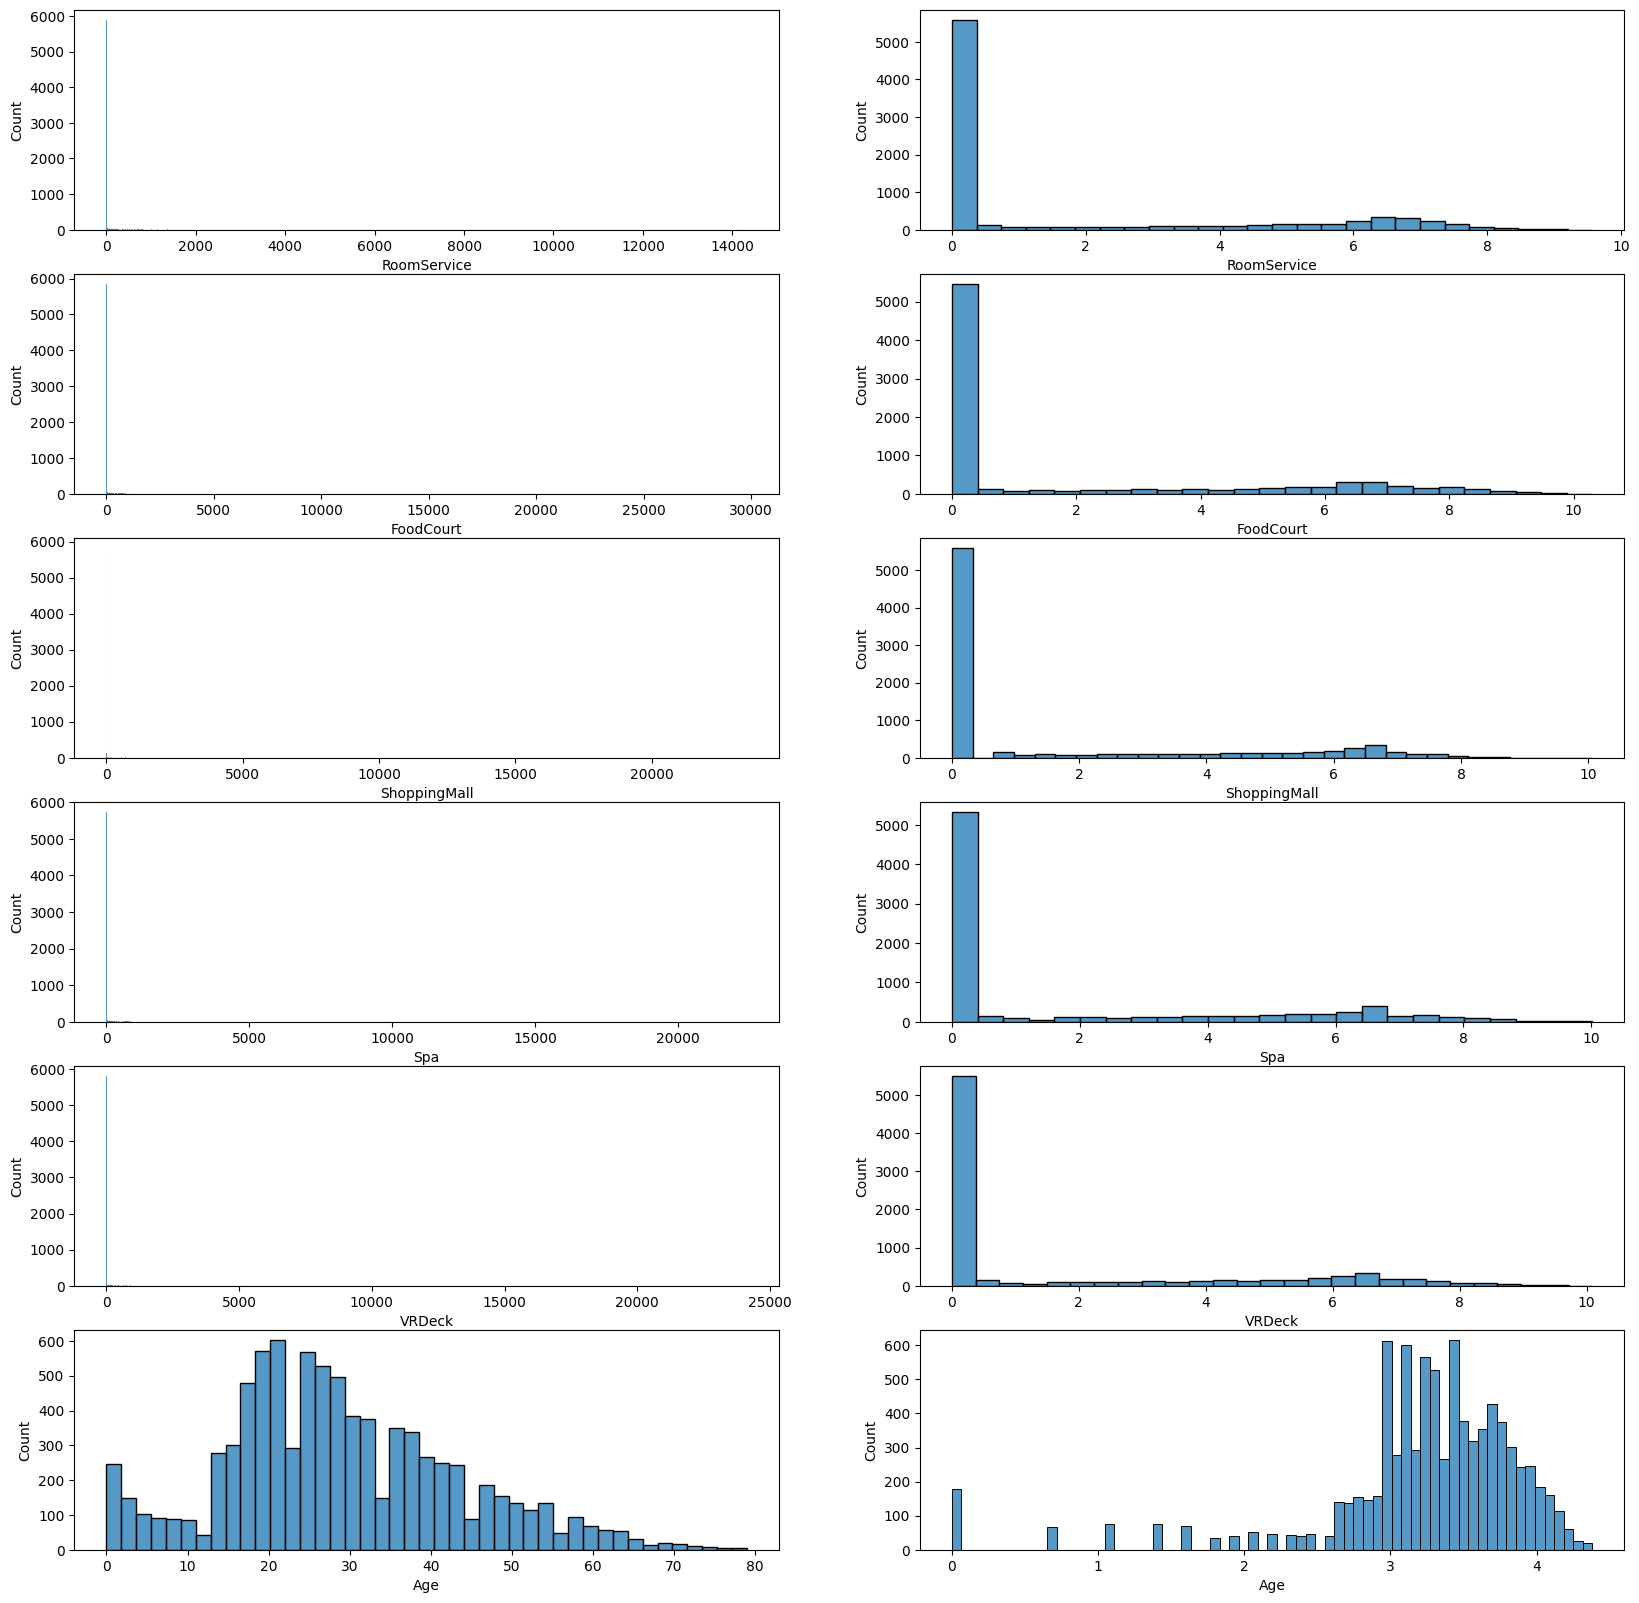

In [12]:
plt.rcParams["figure.figsize"] = (20, 20)
fig, axes= plt.subplots(nrows=6, ncols=2)

sns.histplot(df["RoomService"], ax=axes[0][0])
sns.histplot(np.log1p(df["RoomService"]), ax=axes[0][1])

sns.histplot(df["FoodCourt"], ax=axes[1][0])
sns.histplot(np.log1p(df["FoodCourt"]), ax=axes[1][1])

sns.histplot(df["ShoppingMall"], ax=axes[2][0])
sns.histplot(np.log1p(df["ShoppingMall"]), ax=axes[2][1])

sns.histplot(df["Spa"], ax=axes[3][0])
sns.histplot(np.log1p(df["Spa"]), ax=axes[3][1])

sns.histplot(df["VRDeck"], ax=axes[4][0])
sns.histplot(np.log1p(df["VRDeck"]), ax=axes[4][1])

sns.histplot(df["Age"], ax=axes[5][0])
sns.histplot(np.log1p(df["Age"]), ax=axes[5][1])
plt.show()

In [13]:
df_copied= df.copy()
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [14]:
# Split cabins and make new features
cabin_splits= df_copied["Cabin"].str.split("/", expand=True)
df_copied["Deck"]= cabin_splits[0]
df_copied["Cabin_num"]= pd.to_numeric(cabin_splits[1], errors="coerce")
df_copied["Side"]= cabin_splits[2]

In [15]:
# Categorical null
for col in categorical_features:
    top= df_copied[col].describe().top
    df_copied[col] = df_copied[col].fillna(top)

# Numerical null handling
numerical_features= list(df_copied.describe().columns)
for col in numerical_features:
    if col != "Age":
        mean_= round(df_copied[col].mean(),2)
        df_copied[col]= df_copied[col].fillna(mean_)
    else:
        median_ = df_copied[col].median()
        df_copied[col]= df_copied[col].fillna(median_)

df_copied["Deck"]= df_copied["Deck"].fillna("unknown")
df_copied["Cabin_num"]= df_copied["Cabin_num"].fillna(-1)
df_copied["Side"]= df_copied["Side"].fillna("unknown")
# Drop Name and Cabin
df_copied.drop(["Name", "Cabin"], axis=1, inplace=True)

## Feature Engineering

In [16]:
# Convert target to int
df_copied["Transported"]= df_copied["Transported"].astype(int)

In [17]:
# Numerical columns transformation
cols_to_transform= ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in cols_to_transform:
    df_copied[col + "_spent"]= (df_copied[col]>0).astype(int)
    df_copied[col]= np.where(df_copied[col]>0, np.log1p(df_copied[col]), 0)

In [18]:
def handle_cabin(df:pd.DataFrame):
    # Split cabins and make new features
    cabin_splits= df["Cabin"].str.split("/", expand=True)
    df["Deck"]= cabin_splits[0]
    df["Cabin_num"]= pd.to_numeric(cabin_splits[1], errors="coerce")
    df["Side"]= cabin_splits[2]
    return df

def handle_null(df: pd.DataFrame):
    # Categorical null
    for col in categorical_features:
        top= df[col].describe().top
        df[col] = df[col].fillna(top)
    
    # Numerical null handling
    numerical_features= list(df.describe().columns)
    for col in numerical_features:
        if col != "Age":
            mean_= round(df[col].mean(),2)
            df[col]= df[col].fillna(mean_)
        else:
            median_ = df[col].median()
            df[col]= df[col].fillna(median_)
    
    df["Deck"]= df["Deck"].fillna("unknown")
    df["Cabin_num"]= df["Cabin_num"].fillna(-1)
    df["Side"]= df["Side"].fillna("unknown")
    # Drop Name and Cabin
    df.drop(["Name", "Cabin"], axis=1, inplace=True)
    return df

def feature_transformation(df: pd.DataFrame):
    cols_to_transform= ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for col in cols_to_transform:
        df[col + "_spent"]= (df[col]>0).astype(int)
        df[col]= np.where(df[col]>0, np.log1p(df[col]), 0)
    return df

def handle_binary_features(df:pd.DataFrame):
    binary_features= ["CryoSleep", "VIP"]
    target= "Transported"
    if  target in df.columns:
        binary_features.append(target)
    for col in binary_features:
        df[col]= df[col].astype(int)
    return df

def categorical_encoding(
    df: pd.DataFrame,
    encoder=None,
    fit=True):
    categorical_features= ["HomePlanet", "Destination", "Deck", "Side"]
    if fit:
        encoder= OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        encoder.fit(df[categorical_features])
    encoded_array= encoder.transform(df[categorical_features])
    encoded_df= pd.DataFrame(
        encoded_array,
        columns= encoder.get_feature_names_out(categorical_features)
    )
    df_encoded= pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
    return df_encoded, encoder

def scale_features(
    df:pd.DataFrame,
    standard_scaler=None,
    fit=True
):
    scalable_features= ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Cabin_num"]
    if fit:
        standard_scaler= StandardScaler()
        standard_scaler.fit(df[scalable_features])
    scaled_array= standard_scaler.transform(df[scalable_features])
    df_scaled= df.copy()
    df_scaled[scalable_features]= scaled_array
    return df_scaled, standard_scaler

def data_preprocessing(df: pd.DataFrame, encoder=None, fit_encoder=True, standard_scaler=None, fit_scaler=True):
    df= handle_cabin(df)
    df= handle_null(df)
    df= feature_transformation(df)
    df= handle_binary_features(df)
    df, encoder= categorical_encoding(df, encoder=encoder, fit=fit_encoder)
    df, scaler= scale_features(df, standard_scaler= standard_scaler, fit= fit_scaler)
    return df, encoder, scaler

In [19]:
df_processed, encoder, scaler= data_preprocessing(df.copy())
print(df_processed.head(2))

  PassengerId  CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0     0001_01          0  0.711945    0    -0.670352  -0.682962     -0.659829   
1     0002_01          0 -0.334037    0     1.034602   0.089587      0.587902   

        Spa    VRDeck  Transported  Cabin_num  RoomService_spent  \
0 -0.697089 -0.673679            0  -1.186627                  0   
1  1.547359  0.689153            1  -1.186627                  1   

   FoodCourt_spent  ShoppingMall_spent  Spa_spent  VRDeck_spent  \
0                0                   0          0             0   
1                1                   1          1             1   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0               0.0                1.0              0.0   
1               1.0                0.0              0.0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                      0.0                        0.0   
1                      0.0                        0.0   


In [20]:
X_train, X_test, y_train, y_test= train_test_split(df_processed.drop(["PassengerId", "Transported"], axis=1), df_processed["Transported"], random_state=1234, test_size=0.2)

In [21]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred_train= lr.predict(X_train)
pred_test= lr.predict(X_test)

In [23]:
print("------------- TRAIN -------------")
print(classification_report(y_train, pred_train))
print()
print()
print("------------- TEST -------------")
print(classification_report(y_test, pred_test))

------------- TRAIN -------------
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3437
           1       0.78      0.80      0.79      3517

    accuracy                           0.79      6954
   macro avg       0.79      0.79      0.79      6954
weighted avg       0.79      0.79      0.79      6954



------------- TEST -------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       878
           1       0.78      0.79      0.78       861

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [24]:
submission= test[["PassengerId"]]
data, _,_= data_preprocessing(test.drop("PassengerId", axis=1), encoder=encoder, standard_scaler=scaler, fit_encoder=False, fit_scaler=False)

In [25]:
prediction= lr.predict(data)
submission["Transported"]= prediction
submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [26]:
submission["Transported"]= submission["Transported"].astype(bool)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [27]:
submission.to_csv("submission.csv", index=False)